In [1]:
import heapq
from collections import defaultdict, deque
from functools import reduce
from typing import Dict, List, Literal, Optional

from graph_helper import Node, create_graph, display_graph, draw_graph

%load_ext autoreload
%autoreload 2

In [2]:
class Solution:  # 91% time, 90% memory
    def numIslands(self, grid: List[List[str]]) -> int:
        # When encountering a 1, it is the start of an island
        # so BFS from that point and remove any 1s that are a art of the island
        res = 0
        ROWS, COLS = len(grid), len(grid[0])

        def bfs(ROW: int, COL: int) -> None:
            nonlocal grid, ROWS, COLS
            stack = [(ROW, COL)]
            while stack:
                for _ in range(len(stack)):
                    row, col = stack.pop(0)  # popleft
                    if (
                        0 <= row < ROWS  # 0 <= is important for bounds checking
                        and 0 <= col < COLS
                        and grid[row][col] == "1"
                    ):  # if the position is a '1', keep bfs
                        grid[row][col] = "0"
                        stack.append((row - 1, col))  # above
                        stack.append((row + 1, col))  # below
                        stack.append((row, col - 1))  # left
                        stack.append((row, col + 1))  # right

        for row in range(ROWS):
            for col in range(COLS):
                if grid[row][col] == "1":  # will only encounter unique islands
                    # bfs will turn an island into all '0's
                    res += 1
                    bfs(row, col)

        return res


numIslands = Solution()
numIslands.numIslands(
    [
        ["1", "1", "1", "1", "0"],
        ["1", "1", "0", "1", "0"],
        ["1", "1", "0", "0", "0"],
        ["0", "0", "0", "0", "0"],
    ]
)

1

**133. Clone Graph**

Given: a referecne of a node in a [connected](<https://en.wikipedia.org/wiki/Connectivity_(graph_theory)>) undirected graph.

Test case format:

For simplicity, each node's value is the same as the node's index (1-indexed). For example, the first node with val == 1, the second node with val == 2, and so on. The graph is represented in the test case using an adjacency list.

An adjacency list is a collection of unordered lists used to represent a finite graph. Each list describes the set of neighbors of a node in the graph.

```python
# ex)
[[2,3], [1,3], [1,2]]
# first index = first node: [2,3] means first node is separated by 1 edge (they are vertices of the same edge) with the nodes 2 and 3
# second index = second node: [1,3] means node 2 is adjacent to 1 and 3
# etc:
'''
1 - 2
 \ /
  3
'''
```

The given node will always be the first node with val = 1. You must return the copy of the given node as a reference to the cloned graph.


In [3]:
class Solution:  # 80% time, 60% memory
    def cloneGraph(self, node: Optional["Node"]) -> Optional["Node"]:
        # graph is undirected, so adding a neighbor can be done to two nodes at once
        # (both neighbors are each others neighbors)
        # similar to copy list with random pointer
        old_to_new = {None: None}
        # need to populate None because it won't get added during dfs

        def dfs(curNode: Node):
            if curNode and curNode not in old_to_new:
                old_to_new[curNode] = Node(curNode.val)
                for nextNode in curNode.neighbors:
                    old_to_new[curNode].neighbors.append(dfs(nextNode))
            return old_to_new[curNode]

        return dfs(node)


node = create_graph([[2, 4, 5], [1, 3], [2, 4], [1, 3], []])
cloneGraph = Solution()
clone = cloneGraph.cloneGraph(node)
display_graph(clone)

Node: 1, Neighbors: [2, 4, 5]
Node: 2, Neighbors: [1, 3]
Node: 4, Neighbors: [1, 3]
Node: 5, Neighbors: []
Node: 3, Neighbors: [2, 4]


Attempting again after a while lol September 29, 2024


In [4]:
class Solution:  # 66% time, 44% memory
    def cloneGraph(self, node: Optional["Node"]) -> Optional["Node"]:
        if node is None:
            return None

        # init graph and first node in graph
        dct: Dict[int, Node] = {}

        # DFS
        def dfs(node: Node):
            nonlocal dct
            if node.val in dct:
                # already processed
                return dct[node.val]
            dct[node.val] = Node(node.val)
            for neigh in node.neighbors:
                dct[node.val].neighbors.append(dfs(neigh))
            return dct[node.val]

        return dfs(node)


node = create_graph([[2, 4, 5], [1, 3], [2, 4], [1, 3], []])
clone = Solution().cloneGraph(node)
display_graph(clone)

Node: 1, Neighbors: [2, 4, 5]
Node: 2, Neighbors: [1, 3]
Node: 4, Neighbors: [1, 3]
Node: 5, Neighbors: []
Node: 3, Neighbors: [2, 4]


**695. Max Area of Island**

Number of islands while incrementing a counter as you flip 1s lol


In [5]:
class Solution:  # 97% time, 96% memory
    def maxAreaOfIsland(self, grid: List[List[int]]) -> int:
        ROWS, COLS = len(grid), len(grid[0])

        def bfs(ROW: int, COL: int) -> int:  # iterative BFS
            curArea = 0  # will hold current island's area
            stack = [(ROW, COL)]
            while stack:
                for _ in range(len(stack)):
                    row, col = stack.pop(0)
                    if 0 <= row < ROWS and 0 <= col < COLS and grid[row][col]:
                        curArea += 1  # increment current island's area
                        grid[row][col] = (
                            0  # this ensures that the 1 is only considered once
                        )
                        # continuing the Breadth-first search
                        stack.append((row - 1, col))  # above
                        stack.append((row + 1, col))  # below
                        stack.append((row, col - 1))  # left
                        stack.append((row, col + 1))  # right
            return curArea

        maxArea = 0
        for row in range(ROWS):
            for col in range(COLS):
                if grid[row][col]:
                    maxArea = max(maxArea, bfs(row, col))
        return maxArea


maxAreaOfIsland = Solution()
maxAreaOfIsland.maxAreaOfIsland(
    [
        [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
        [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0],
        [0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    ]
)

6

**417. Pacific Atlantic Water Flow**

NeetCode solution is below this one:

-   He did DFS
-   I also did DFS but iteratively (I initially thought it was BFS but it isn't)


In [6]:
# Attempt on Nov 28, 2024 (Having already solved it a long time ago)
class Solution:  # 96.4% time, 11.7% memory
    def pacificAtlantic(self, heights: List[List[int]]) -> List[List[int]]:
        """
        Instead of looking for which water cells can reach both oceans
        Look for which water cells the atlantic can reach by flipping the water flow constraint
        Same for pacific
        Then return the intersection
        """

        ROWS = len(heights)
        COLS = len(heights[0])
        neighs = [(-1, 0), (1, 0), (0, -1), (0, 1)]

        def dfs(starting_indices: list[tuple[int, int]]):
            # init the set to store all the positions that water can flow from the ocean into. (reversing the water flow constraint)
            # we know that all the starting indices can reach the ocean by definition:
            ocean = set(starting_indices)
            # use the list as a stack
            stack = starting_indices[:]
            while stack:
                x, y = stack.pop()
                for dx, dy in neighs:
                    nx, ny = x + dx, y + dy
                    # adding the set existence check as the first condition increases time from 60% to 96% (since it is will fail the most often)
                    if (
                        (nx, ny) not in ocean
                        and 0 <= nx < ROWS
                        and 0 <= ny < COLS
                        and heights[nx][ny] >= heights[x][y]
                    ):
                        # flipping the water constraint since we are moving in opposite of flow ^
                        ocean.add((nx, ny))
                        stack.append((nx, ny))
            return ocean

        atlantic_starting_indices = []
        for col in range(COLS):
            atlantic_starting_indices.append((ROWS - 1, col))
        for row in range(ROWS):
            atlantic_starting_indices.append((row, COLS - 1))
        atlantic_ocean = dfs(atlantic_starting_indices)

        pacific_starting_indices = []
        for col in range(COLS):
            pacific_starting_indices.append((0, col))
        for row in range(ROWS):
            pacific_starting_indices.append((row, 0))
        pacific_ocean = dfs(pacific_starting_indices)

        return [list(s) for s in atlantic_ocean.intersection(pacific_ocean)]


pacificAtlantic = Solution()
print(
    pacificAtlantic.pacificAtlantic(
        [
            [1, 2, 2, 3, 5],
            [3, 2, 3, 4, 4],
            [2, 4, 5, 3, 1],
            [6, 7, 1, 4, 5],
            [5, 1, 1, 2, 4],
        ]
    )
)
print(pacificAtlantic.pacificAtlantic([[1]]))
print(pacificAtlantic.pacificAtlantic([[1, 2, 1, 1], [5, 4, 2, 1], [1, 4, 4, 3]]))

[[4, 0], [0, 4], [3, 1], [1, 4], [3, 0], [2, 2], [1, 3]]
[[0, 0]]
[[0, 1], [1, 2], [2, 1], [1, 1], [0, 3], [2, 0], [2, 3], [0, 2], [2, 2], [1, 0], [1, 3]]


In [7]:
class Solution:  # 99% time, 63% memory
    def pacificAtlantic(self, heights: List[List[int]]) -> List[List[int]]:
        # instead of checking every cell in the board O((n*m)^2)
        # start from the border touching each ocean because those cells are guaranteed
        # then from the border move inward and find the cells who can also touch the ocean being considered
        # pacific and atlantic are done separately
        # then return the intersection

        atlantic = set()  # all positions that can reach atlantic
        pacific = set()  # all positions that can reach pacific

        ROWS, COLS = len(heights), len(heights[0])

        def dfs(row: int, col: int, ocean: set[tuple[int, int]]):
            if (row, col) in ocean:  # if already visited
                return
            ocean.add((row, col))  #

            if (0 <= row - 1) and heights[row - 1][col] >= heights[row][col]:
                dfs(row - 1, col, ocean)
            if (row + 1 < ROWS) and heights[row + 1][col] >= heights[row][col]:
                dfs(row + 1, col, ocean)
            if (0 <= col - 1) and heights[row][col - 1] >= heights[row][col]:
                dfs(row, col - 1, ocean)
            if (col + 1 < COLS) and heights[row][col + 1] >= heights[row][col]:
                dfs(row, col + 1, ocean)
            # end of dfs
            return

        # fill oceans:
        for col in range(COLS):
            dfs(0, col, pacific)
            dfs(ROWS - 1, col, atlantic)
        for row in range(ROWS):
            dfs(row, 0, pacific)
            dfs(row, COLS - 1, atlantic)

        return [list(coord) for coord in atlantic.intersection(pacific)]


pacificAtlantic = Solution()
pacificAtlantic.pacificAtlantic(
    [
        [1, 2, 2, 3, 5],
        [3, 2, 3, 4, 4],
        [2, 4, 5, 3, 1],
        [6, 7, 1, 4, 5],
        [5, 1, 1, 2, 4],
    ]
)

[[4, 0], [0, 4], [3, 1], [1, 4], [3, 0], [2, 2], [1, 3]]

**130. Surrounded regions**


In [8]:
class Solution:
    def solveSlow(self, board: List[List[str]]) -> None:  # 14% time, 20% memory
        """
        Do not return anything, modify board in-place instead.

        This finds a region of 'O's and checks to see if its an island
        captures if it is
        """
        # similar to num islands, the captured zones are islands
        # when an island is found, BFS until you reach a border or all 'X'
        # then if no border is found, turn the whole island into 'O'
        ROWS, COLS = len(board), len(board[0])

        def bfs(row, col):  # only called in the main loop for 'O' positions
            seen: set[tuple[int, int]] = set()  # keep track of who to update
            stack = [(row, col)]
            while stack:
                for _ in range(len(stack)):
                    r, c = stack.pop(0)
                    # not captured is the island reaches the ocean
                    if r in [0, ROWS - 1] or c in [0, COLS - 1]:
                        if board[r][c] == "O":
                            return

                    # not in bounds or already visited
                    if not (0 <= r < ROWS) or not (0 <= c < COLS) or (r, c) in seen:
                        continue

                    # here the position is in bounds
                    seen.add((r, c))
                    # if position is 'X'
                    if board[r][c] == "X":
                        continue

                    # at this point the cell is 'O' and not in the border
                    stack.append((r - 1, c))  # above
                    stack.append((r + 1, c))  # below
                    stack.append((r, c - 1))  # left
                    stack.append((r, c + 1))  # right
            # if it gets to here, it means the 'island' of 'O's were disconnected from the border
            # update all seen
            for r, c in seen:
                board[r][c] = "X"
            return

        # then do bfs at every 'O' cell
        for row in range(ROWS):
            for col in range(COLS):
                if board[row][col] == "O":
                    bfs(row, col)

    def solve(self, board: List[List[int]]):  # 98.6% time, 88.5% memory
        """
        This approach will be different, instead of starting from island and trying to reach border with 'O's.
        Will start from border and find the non-islands ('O's connected to border)
        """
        ROWS, COLS = len(board), len(board[0])
        not_surrounded = set()  # will be used as a 'seen' hashset

        def dfs(row, col):
            if (row, col) in not_surrounded:
                return
            if not (0 <= row < ROWS) or not (0 <= col < COLS):
                return
            if board[row][col] == "X":
                return

            not_surrounded.add((row, col))
            dfs(row - 1, col)
            dfs(row + 1, col)
            dfs(row, col - 1)
            dfs(row, col + 1)

        # top and bottom border:
        for row in [0, ROWS - 1]:
            for col in range(COLS):
                if board[row][col] == "O":
                    dfs(row, col)
        # left and right border
        for row in range(ROWS):
            for col in [0, COLS - 1]:
                if board[row][col] == "O":
                    dfs(row, col)
        # then go through the board and update the captured 'O' (the ones not in not_surrounded)
        for row in range(1, ROWS - 1):  # don't need t check the border again
            for col in range(1, COLS - 1):
                if board[row][col] == "O" and (row, col) not in not_surrounded:
                    board[row][col] = "X"


solve = Solution()
board = [
    ["X", "X", "X", "X"],
    ["X", "O", "O", "X"],
    ["X", "X", "O", "X"],
    ["X", "O", "X", "X"],
]
solve.solve(board)
board

[['X', 'X', 'X', 'X'],
 ['X', 'X', 'X', 'X'],
 ['X', 'X', 'X', 'X'],
 ['X', 'O', 'X', 'X']]

**994. Rotting Oranges**


In [9]:
# Additional attempt months later (November 28, 2024)
class Solution:  # 89% time, 8% memory
    def orangesRotting(self, grid: List[List[int]]) -> int:
        """
        BFS with the starting stack being all the initial rotten oranges
        Keep track of iteration
        If at the end of BFS, any healthy oranges remain, you are cooked
        """

        ROWS = len(grid)
        COLS = len(grid[0])
        # init stack for bfs
        rottens = []

        for row in range(ROWS):
            for col in range(COLS):
                if grid[row][col] == 2:
                    rottens.append((row, col))

        minutes = 0
        # do BFS
        dirs = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        while rottens:
            haveRotted: bool = False
            for _ in range(len(rottens)):
                # popleft since we are adding to the end
                x, y = rottens.pop(0)
                for dx, dy in dirs:
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < ROWS and 0 <= ny < COLS and grid[nx][ny] == 1:
                        if not haveRotted:
                            haveRotted = True
                            minutes += 1
                        grid[nx][ny] = 2
                        rottens.append((nx, ny))

        for row in range(ROWS):
            for col in range(COLS):
                if grid[row][col] == 1:
                    # fresh orange still exists
                    return -1
        return minutes


orangesRotting = Solution()
print(orangesRotting.orangesRotting([[2, 1, 1], [1, 1, 0], [0, 1, 1]]))
print(orangesRotting.orangesRotting([[2, 1, 1], [0, 1, 1], [1, 0, 1]]))
print(orangesRotting.orangesRotting([[0, 2]]))

4
-1
0


In [10]:
class Solution:
    def orangesRotting(self, grid: List[List[int]]) -> int:  # 89% time, 64% memory
        # BFS on all rotten oranges at the same time (starting stack contains all rotten positions)
        # they will all rot oranges, and then the result is how many levels the BFS goes through
        # keep track of visited cells by turning them into 2s
        num_fresh = 0
        rotten = []
        ROWS, COLS = len(grid), len(grid[0])
        for r in range(ROWS):
            for c in range(COLS):
                if grid[r][c] == 1:
                    num_fresh += 1
                elif grid[r][c] == 2:
                    rotten.append((r, c))

        # bfs
        depth = 0
        directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

        while rotten and num_fresh:  # stop once num_fresh is zero
            for _ in range(len(rotten)):
                r, c = rotten.pop(0)
                for dr, dc in directions:
                    row, col = r + dr, c + dc
                    if (0 <= row < ROWS) and (0 <= col < COLS) and grid[row][col] == 1:
                        rotten.append((row, col))
                        num_fresh -= 1
                        grid[row][col] = 2
            depth += 1  # rotting next level of fresh oranges
        return depth if num_fresh == 0 else -1


orangesRotting = Solution()
orangesRotting.orangesRotting([[2, 1, 1], [1, 1, 0], [0, 1, 1]])

4

**207. Course Schedule**


In [ ]:
class Solution:  # 65% time, 80% memory
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        # build a hashmap with a course as key and prereqs as value
        # a course can be complete if its prereqs are empty
        # the DFS will handle making upstream courses have empty prereqs by removing fulfillable courses

        # detect cycles via a visited set
        visited = set()
        courses = {i: [] for i in range(numCourses)}
        for course, prereq in prerequisites:
            courses[course].append(prereq)

        def dfs(course: int) -> bool:
            if courses[course] == []:  # base case success
                return True
            if (
                course in visited
            ):  # base case failure, if a course has already been visited and it hasnt returned True based on the condition above
                # it is not fulfillable. If it was visited and fulfillable, the second last line of this dfs function would ensure that it returns True above.
                return False
            visited.add(course)
            for i in courses[course]:
                if not dfs(i):
                    return False
            courses[
                course
            ] = []  # this course is fulfillable therefore all its prereqs are too
            return True

        for course in range(numCourses):
            if not dfs(course):
                return False
        return True

    # Topological Sort version Kahn's algorithm
    # 95% time, 80% memory
    def canFinishTopologicalSort(
        self, numCourses: int, prerequisites: List[List[int]]
    ) -> bool:
        """
        This version attmepts to do a topological sort of the graph.
            Placing the nodes into an array based on the order they can be reached
            A node with no pointers to it would be placed first because you can get to it right away
            Then its descendants would be placed in succession
            If there are multiple nodes that have no parent, this happens for all of them simultaneously
                in a BFS type of algorithm

        This sort does not work if there is a cycle, because there is a point where there are no nodes with an
        Indegree of 0 (indegree = number of edges leading to a node).
        When placing a node into the array, you decrement its children's indegree
        Only nodes with indegree=0 can be placed into array

        Here we aren't using the array, we just need to keep track of how many nodes are visited
        If it is less than the number of total nodes, there is a cycle and return False
        otherwise True
        """
        prereqs = {
            i: [] for i in range(numCourses)
        }  # prereq points to all the courses it is a prereq for
        indegree = [0] * numCourses
        num_visited = 0
        for course, prereq in prerequisites:
            prereqs[prereq].append(course)
            indegree[course] += 1
        # setup complete
        # need to start with positions whose indegrees are zero (no prereqs)
        stack = []
        for i in range(len(indegree)):
            if indegree[i] == 0:
                stack.append(i)
        while stack:  # the bfs
            for _ in range(len(stack)):
                prereq = stack.pop(0)
                num_visited += 1
                for course in prereqs[prereq]:
                    indegree[course] -= 1
                    if indegree[course] == 0:
                        stack.append(course)

        if num_visited != numCourses:
            return False
        return True


canFinish = Solution()
canFinish.canFinishTopologicalSort(2, [[1, 0]])

True

**210. Course schedule 2**


In [12]:
# Additional attempt months later (November 29, 2024)
class Solution:  # 78% time, 5% memory
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List[int]:
        # topological sort via dfs
        # first step is build the graph:
        # numCourses <= 2000 so we can split the graph into two parts using integer division
        graph: List[List[int]] = [[] for _ in range(numCourses)]
        for course, prereq in prerequisites:
            graph[course].append(prereq)

        # init res
        res = []

        # 1 == being processed (used to find cycles)
        # 2 == already completed
        visited: Dict[int, Literal[1, 2]] = {}
        # ^ can replace this with 2 sets instead

        def dfs(course: int):
            if course in visited:
                if visited[course] == 1:
                    # cycle detected
                    return False
                else:
                    # already added to `res`
                    return True
            visited[course] = 1
            for prereq in graph[course]:
                if not dfs(prereq):
                    # cycle when completing prereq
                    return False
            visited[course] = 2
            res.append(course)
            return True

        completed = [0] * numCourses
        for course in range(numCourses):
            if completed[course]:
                continue
            elif not dfs(course):
                return []
            completed[course] = 1
        # ignore the first index
        return res


findOrder = Solution()
print(findOrder.findOrder(2, [[1, 0]]))
print(findOrder.findOrder(4, [[1, 0], [2, 0], [3, 1], [3, 2]]))
print(findOrder.findOrder(1, []))

[0, 1]
[0, 1, 2, 3]
[0]


In [13]:
class Solution:  # 80% time, 70% memory
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List[int]:
        # this is asking exactly for a topological sort
        prereqs: dict[int, List[int]] = {i: [] for i in range(numCourses)}
        # prereqs is a hashmap where a prereq points to all of the courses that need it to be done
        indegree: List[int] = [0] * numCourses

        res = []  # return value

        # populate prereqs and indegree
        for course, prereq in prerequisites:
            prereqs[prereq].append(course)
            indegree[course] += 1

        stack = []  # indegrees of zero
        for i, n in enumerate(indegree):
            if n == 0:
                stack.append(i)
        # setup complete
        # bfs
        while stack:
            for _ in range(len(stack)):
                prereq = stack.pop(0)
                res.append(prereq)  # adds in order of traversal
                # (simultaneously moving from all starting points)
                for course in prereqs[prereq]:
                    indegree[course] -= 1
                    if indegree[course] == 0:
                        stack.append(course)

        return res if len(res) == numCourses else []  # this is failure condition

    def findOrderNeetCode(
        self, numCourses: int, prerequisites: List[List[int]]
    ) -> List[int]:
        prereq = {c: [] for c in range(numCourses)}
        for crs, pre in prerequisites:
            prereq[crs].append(pre)

        output = []
        visit, cycle = set(), set()

        def dfs(crs):
            if crs in cycle:
                return False
            if crs in visit:
                return True

            cycle.add(crs)
            for pre in prereq[crs]:
                if dfs(pre) == False:
                    return False
            cycle.remove(crs)
            visit.add(crs)
            output.append(crs)
            return True

        for c in range(numCourses):
            if dfs(c) == False:
                return []
        return output


findOrder = Solution()
findOrder.findOrder(4, [[1, 0], [2, 0], [3, 1], [3, 2]])

[0, 1, 2, 3]

**684. Redundant connection**

Union Find


[2, 3]
[1, 4]
[4, 10]


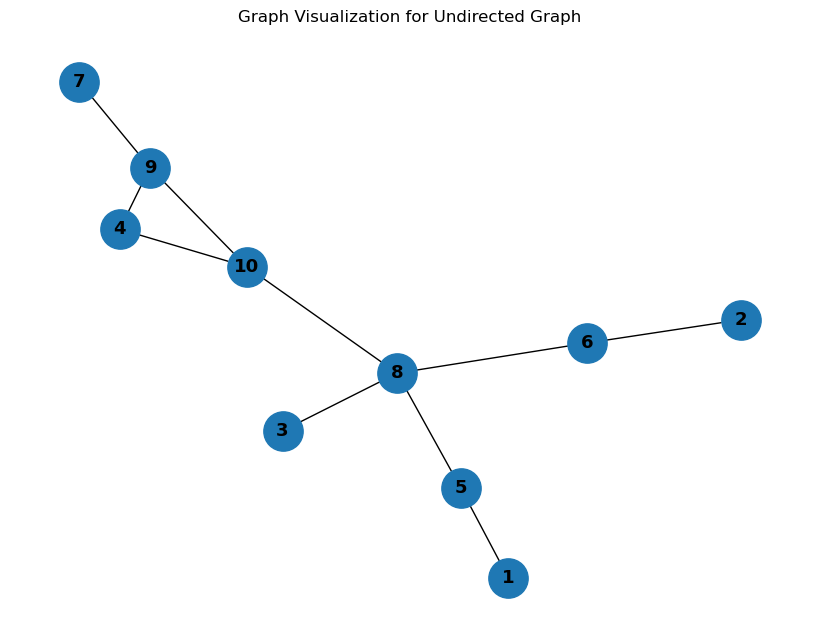

In [24]:
class Solution:  # 81% time, 80% memory
    def findRedundantConnection(self, edges: List[List[int]]) -> List[int]:
        # will use edges as the array of parents (since they start as parents of themselves)
        # the values range from 1 to len(edges)
        # will pad the lists with an extra value
        #   because i don't want to subtract one everytime i index
        parents = [i for i in range(len(edges) + 1)]  # n-nodes max possible
        rank = [1] * (len(edges) + 1)  # rank for the maximum n-nodes

        def find(n):
            p = parents[n]
            while p != parents[p]:
                parents[p] = parents[
                    parents[p]
                ]  # this just shortens the path for future checks
                p = parents[p]
            return p

        # return False if cannot union (they are already merged)
        def union(n1, n2):
            """
            In union you combine the representatives of two clusters together
            In this case the representative is the overall parent
            And the combination is done by making the smaller rank parent a child of the higher rank parent
            """
            p1 = find(n1)
            p2 = find(n2)
            if p1 == p2:  # redundant connection
                return False
            if rank[p1] > rank[p2]:
                parents[p2] = p1
                rank[p1] += 1
            else:
                parents[p1] = p2
                rank[p2] += 1
            return True

        for n1, n2 in edges:
            if not union(
                n1, n2
            ):  # every time a redundant one is found update to most recent
                redundant = [n1, n2]
        return redundant
        # bound to return


findRedundantConnection = Solution()
print(findRedundantConnection.findRedundantConnection([[1, 2], [1, 3], [2, 3]]))
print(
    findRedundantConnection.findRedundantConnection(
        [[1, 2], [2, 3], [3, 4], [1, 4], [1, 5]]
    )
)
print(
    findRedundantConnection.findRedundantConnection(
        [
            [9, 10],
            [5, 8],
            [2, 6],
            [1, 5],
            [3, 8],
            [4, 9],
            [8, 10],
            [4, 10],
            [6, 8],
            [7, 9],
        ]
    )
)

list_graph = [[] for _ in range(11)]
for left, right in [
    [9, 10],
    [5, 8],
    [2, 6],
    [1, 5],
    [3, 8],
    [4, 9],
    [8, 10],
    [4, 10],
    [6, 8],
    [7, 9],
]:
    list_graph[left].append(right)
draw_graph(list_graph)

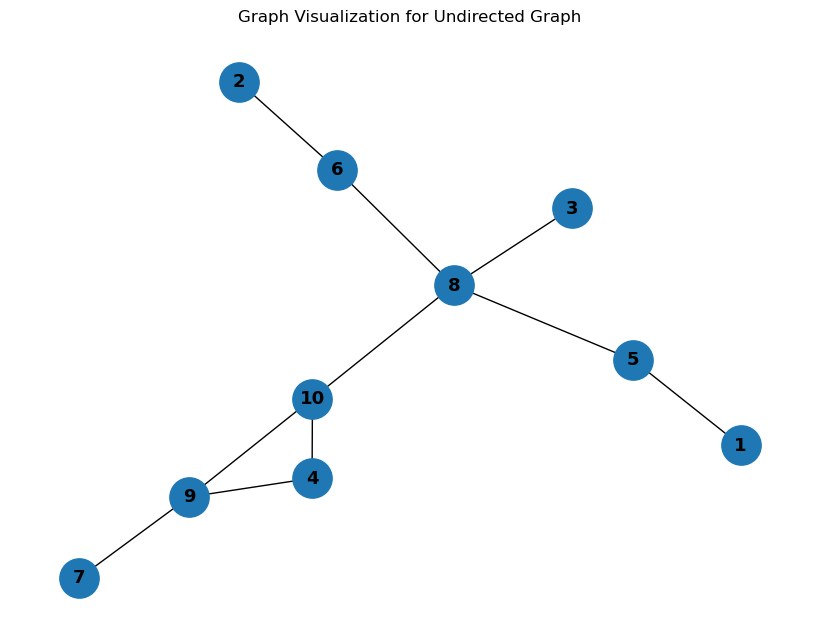

**323. Count Number of Connected Components**

Union-Find

Given `n` and `edges` where `edges[i]` is an undirected edge connecting `edges[i][0]` and `edges[i][1]`

The nodes are numbered from 0 to n - 1.


In [15]:
class Solution:
    def find(self, n, parents):
        p = parents[n]
        while p != parents[p]:
            # accelerate future searches
            parents[p] = parents[parents[p]]
            p = parents[p]
        return p

    def countComponents(self, n: int, edges: List[List[int]]) -> int:
        # initialize a parents array to be updated throughout the union find
        parents = [i for i in range(n)]
        ranks = [1] * n
        # print(parents)
        # each node starts as its own parent
        for n1, n2 in edges:
            p1, p2 = self.find(n1, parents), self.find(n2, parents)
            if p1 == p2:
                continue
            if ranks[p1] >= ranks[p2]:
                parents[p2] = p1
                ranks[p1] += ranks[p2]
                # print(f"{p1} <- {n2}\t", parents)
            else:
                parents[p1] = p2
                ranks[p2] += ranks[p1]
                # print(f"{p2} <- {n1}\t", parents)

        # print(parents)
        res = 0
        # every section will point to a parent who is itself
        for i in range(len(parents)):
            if parents[i] == i:
                res += 1
        # print(parents)
        return res


S = Solution()

print(
    S.countComponents(
        10,
        [
            [8, 9],
            [4, 7],
            [1, 5],
            [0, 4],
            [2, 7],
            [3, 8],
            [7, 9],
            [3, 9],
            [5, 7],
            [6, 8],
        ],
    )
)

print(S.countComponents(n=3, edges=[[0, 1], [0, 2]]))

1
1


**1436. Destination City**


In [16]:
class Solution:  # 77% time, 8% memory
    def destCity(self, paths: List[List[str]]) -> str:
        edges = {}  # don't need a list as values of the dict because the graph forms a line
        for edge in paths:
            edges[edge[0]] = edge[1]

        cur = paths[0][1]
        while cur in edges:
            cur = edges[cur]
        return cur

    def destCitySet(self, paths: List[List[int]]) -> str:  # 81% time, 9% memory
        startingCities = set()
        for p in paths:
            startingCities.add(p[0])
        for p in paths:
            if p[1] not in startingCities:  # found the destination city
                return p[1]


destCity = Solution()
destCity.destCity([["London", "New York"], ["New York", "Lima"], ["Lima", "Sao Paulo"]])

'Sao Paulo'

**386 Lexicographical Numbers**


In [17]:
class Solution:
    def lexicalOrder(self, n: int) -> List[int]:  # 5% time, 7% memory
        res = []

        # O(log_10(n)) space
        # O(n) time, only visiting every node once
        def dfs(cur):
            if cur > n:
                # exit case
                return
            # preorder traversal, since any number being visited is smaller than any number to be visited
            # in this question that is, since we sort lexicographically
            res.append(cur)
            cur *= 10
            for i in range(0, 10):
                if not (cur | i):
                    continue
                dfs(cur + i)

        dfs(0)
        return res[1:]

    def lexicalOrderOptimized(self, n: int) -> List[int]:  # 98.6% time, # 46% memory
        res = []
        cur = 1
        while len(res) < n:
            res.append(cur)
            # can make one integer traverse the entire lexico-graph
            # should only pop up when number is equal to n or at a 9
            if cur * 10 <= n:
                cur *= 10
            else:
                while cur >= n or cur % 10 == 9:
                    cur //= 10
                cur += 1

        return res


S = Solution()
# S.lexicalOrder(89)

S.lexicalOrderOptimized(75)

[1,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 2,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 3,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 4,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 5,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 6,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 7,
 70,
 71,
 72,
 73,
 74,
 75,
 8,
 9]

**Friend Suggestions**

Given `n` the number of users and a 2-d array `friendships` such that friendship[i] is a list of two integers containing the index of two users who are friends, return an array `suggestions` such that suggestions[i] is the user that `i` shares the most mutual friends with but that is not actualy friends with already. If there is more than one such recommendation then return the smallest index.

If a user has no possible recommendation then return a -1 at suggestions[i]


[5, 2, 1, 1, 1, 0, -1, 8, 7, 7]


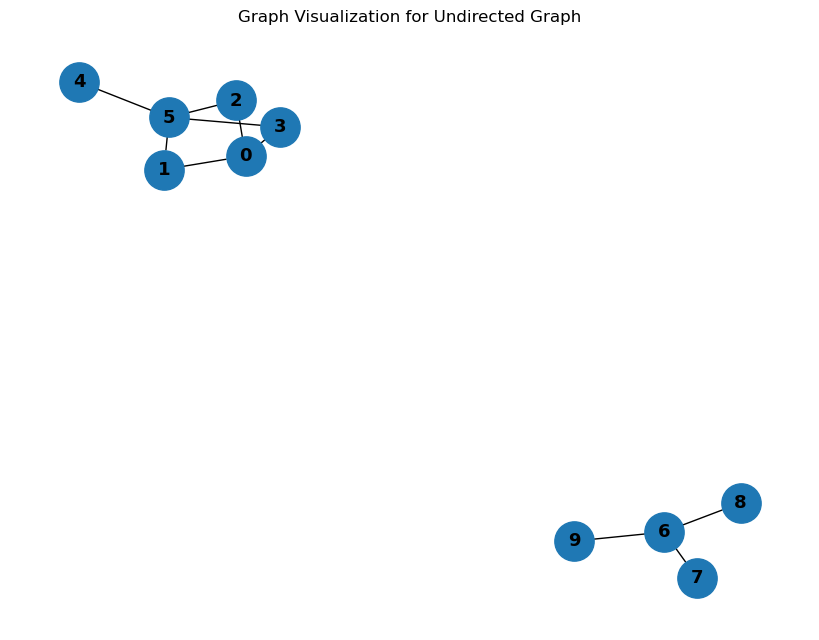

In [18]:
class Solution:
    def friendRecs(self, n: int, friendships: list[list[int]]):
        suggestions = [-1] * (n + 1)
        graph = [set() for _ in range(n + 1)]
        for i in range(len(friendships)):
            graph[friendships[i][0]].add(friendships[i][1])
            graph[friendships[i][1]].add(friendships[i][0])

        for user in range(n + 1):
            potential_recs = {}
            for friend in graph[user]:
                for potential_rec in graph[friend]:
                    if potential_rec not in graph[user] and potential_rec != user:
                        potential_recs[potential_rec] = (
                            potential_recs.get(potential_rec, 0) + 1
                        )
            cur_max = 0
            for rec in potential_recs:
                if potential_recs[rec] > cur_max or (
                    potential_recs[rec] == cur_max and rec < suggestions[user]
                ):
                    cur_max = potential_recs[rec]
                    suggestions[user] = rec

        return graph, suggestions


S = Solution()
graph, suggestions = S.friendRecs(
    9, [[0, 1], [0, 2], [0, 3], [4, 5], [2, 5], [1, 5], [5, 3], [6, 7], [8, 6], [9, 6]]
)
print(suggestions)
draw_graph(graph)

**Walls and Gates** Locked behind paywall so this is neetcode's version Islands and Treasures


In [19]:
class Solution:  # no time and memory percentage but I passed all the testcases
    def islandsAndTreasure(self, grid: List[List[int]]) -> None:
        """
        Looked at NeetCode hints 1 and 2:
        Solution is the exact same as Rotten Oranges:
            Multi-source BFS from the treasures and search outwards
        Every cell gets visited once, the iteration count is the amount of moves required to reach a treasure
        """
        treasures = []
        ROWS = len(grid)
        COLS = len(grid[0])
        for row in range(ROWS):
            for col in range(COLS):
                if grid[row][col] == 0:
                    treasures.append((row, col))

        # now think of the treasures infecting the land cells lol
        # basically just use the `treasures` array as the stack
        num_moves = 0
        dirs = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        while treasures:
            num_moves += 1
            for _ in range(len(treasures)):
                x, y = treasures.pop(0)
                for dx, dy in dirs:
                    nx, ny = x + dx, y + dy
                    if (
                        0 <= nx < ROWS
                        and 0 <= ny < COLS
                        and grid[nx][ny] == (1 << 31) - 1
                    ):
                        grid[nx][ny] = num_moves
                        treasures.append((nx, ny))


islandsAndTreasures = Solution()
input = [
    [2147483647, -1, 0, 2147483647],
    [2147483647, 2147483647, 2147483647, -1],
    [2147483647, -1, 2147483647, -1],
    [0, -1, 2147483647, 2147483647],
]

output = [[3, -1, 0, 1], [2, 2, 1, -1], [1, -1, 2, -1], [0, -1, 3, 4]]

islandsAndTreasures.islandsAndTreasure(input)
print(input == output)

True


**127. Word Ladder**


In [20]:
class SolutionBruteForce:  # Brute Force gets 37/51 test cases then fails on time limit
    def compareWords(self, w1: str, w2: str) -> bool:
        return sum(c1 == c2 for (c1, c2) in zip(w1, w2)) == (len(w1) - 1)

    def ladderLength(self, beginWord: str, endWord: str, wordList: List[str]) -> int:
        """
        Let's try brute-force solution:
        Make undirected graph: word <-> words that are different by 1 letter only
        Then BFS from beginWord, return number of iterations needed to reach endWord, avoid cycles
        """

        # init undirected graph
        graph = {}
        wordList.append(beginWord)
        for w1 in wordList:
            graph[w1] = []
            for w2 in graph:
                if self.compareWords(w1, w2):
                    graph[w1].append(w2)
                    graph[w2].append(w1)

        stack = graph[beginWord][:]
        visited = set()
        numWordsNeeded = 1
        while stack:
            numWordsNeeded += 1
            for _ in range(len(stack)):
                word = stack.pop(0)

                if word in visited:
                    continue
                elif word == endWord:
                    return numWordsNeeded
                else:
                    visited.add(word)
                    words = graph[word]

                    for i in range(len(words)):
                        if words[i] not in visited:
                            stack.append(words[i])

        # if code reaches here, the endWord cannot be reached
        return 0


class Solution:  # 84% time, 25% memory
    def ladderLength(self, beginWord: str, endWord: str, wordList: List[str]) -> int:
        """
        I think the main optimization to make is accelerating graph creation. But how?

        NeetCode: graph creation the naive way (my way) is O(n^2 m) and graph BFS is O(n^2 m)
        Can make the graph in O(n m^2) though

        Where n is number of words in list, m is length of the individual words
        Since m << n, it accelerates the problem quite a lot.

        Instead of comparing each word with every other word
        Just make am adjacency list where the key is the pattern that the word can be
        so hot -> {".ot", "h.t", "ho."}
        Then all the one letter differences will be in the same pattern matched key.


        !!!
        Moving the visited.add(word) from the outer for loop (under the success condition)
        to the inner for loop (inside the if not in visited check) increases time from 25% to 84%
        This is because the outer loop will lead to the same word appearing in that inner loop more than once (across different outer loop iterations)
        So adding it to visited in the first appearance in inner loop will skip the appending in later inner loop.
        !!!
        """
        if endWord not in wordList:
            return 0

        # init undirected graph
        wordList.append(beginWord)
        graph = defaultdict(list)
        for word in wordList:  # O(n k^2)
            for i in range(len(word)):
                pat = word[:i] + "." + word[i + 1 :]
                graph[pat].append(word)

        stack = deque([beginWord])
        visited = set([beginWord])
        numWords = 1
        while stack:
            for _ in range(len(stack)):
                word = stack.popleft()
                if word == endWord:
                    return numWords

                for i in range(len(word)):
                    pat = word[:i] + "." + word[i + 1 :]
                    for newWord in graph[pat]:
                        if newWord not in visited:
                            stack.append(newWord)
                            visited.add(newWord)

            # increment at the end because endWord can be added to queue on the line above
            # and we only find out the next iteration
            numWords += 1

        # failure case (unreachable)
        return 0


ladderLength = Solution()
ladderLength.ladderLength("hit", "cog", ["hot", "dot", "dog", "lot", "log", "cog"])
# ladderLength.ladderLength("a", "c", ["a", "b", "c"])

5

**Graph Valid Tree**


In [ ]:
class Solution:
    def validTree(self, n: int, edges: List[List[int]]) -> bool:
        """
        A tree is just a graph with no cycles
        So just DFS and look for a cycle and check that the number of nodes visited is of len == n

        The problem is that the edges are undirected. So I need to store the avoid adding the current node back to
        the DFS from its neighbours' neighbours
        Solution for that^ pass the parent of the current node (via DFS) and ignore it in during the iteration
        """
        if not edges:
            return n == 1

        graph = defaultdict(list)
        for n1, n2 in edges:
            graph[n1].append(n2)
            graph[n2].append(n1)

        visited = set()

        def dfs(node, parent):
            while graph[node]:
                child = graph[node].pop()
                if child == parent:
                    continue
                elif child in visited:
                    return False
                else:
                    visited.add(child)
                    if not dfs(child, node):
                        return False
            return True

        visited.add(edges[0][0])
        possible = dfs(edges[0][0], None)
        if possible and len(visited) == n:
            # check for disconnected graph as well.
            return True
        return False


validTree = Solution()
print(
    validTree.validTree(
        5,
        [[0, 1], [0, 2], [0, 3], [1, 4]],
    )
)
print(validTree.validTree(5, [[0, 1], [2, 0], [3, 0], [1, 4]]))
print(validTree.validTree(3, []))

True
True
False


**1765. Map of Highest Peak**


In [ ]:
class Solution:
    # 89% time, 96% memory (creating `heights`)
    # 97% time, 99% memory (overwriting `isWater`)
    def highestPeak(self, isWater: List[List[int]]) -> List[List[int]]:
        """
        This seems like a multi-source BFS, the last cell to be reached is necessarily the max height possible since everything is incremented by 1 evenly

        Reminds me a lot of the rotting oranges / pacific-atlantic / i feel like there was a treasure chest question like this or smt

        init the bfs from all sources of water
        """
        ROWS, COLS = len(isWater), len(isWater[0])
        # heights = [[-1] * COLS for _ in range(ROWS)]
        stack = deque()
        for i in range(ROWS):
            for j in range(COLS):
                # 0 is a land cell, 1 is a water cell
                if isWater[i][j]:
                    # mark a water location and add to stack
                    isWater[i][j] = 0
                    stack.append((i, j))
                else:
                    isWater[i][j] = -1

        # do the bfs
        height = 0
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
        while stack:
            height += 1
            for _ in range(len(stack)):
                i, j = stack.popleft()

                for di, dj in directions:
                    ni, nj = i + di, j + dj
                    if 0 <= ni < ROWS and 0 <= nj < COLS and isWater[ni][nj] == -1:
                        # only process an unprocessed node (height == -1)
                        isWater[ni][nj] = height
                        stack.append((ni, nj))
        return isWater


highestPeak = Solution()
print(
    highestPeak.highestPeak(
        [
            [0, 1],
            [0, 0],
        ]
    )
)
print(
    highestPeak.highestPeak(
        [
            [0, 1, 1],
            [1, 1, 1],
            [0, 1, 1],
        ]
    )
)

[[1, 0], [2, 1]]
[[1, 0, 0], [0, 0, 0], [1, 0, 0]]


In [12]:
class Solution:
    # 60% time, 65% memory
    def eventualSafeNodes(self, graph: List[List[int]]) -> List[int]:
        """
        I'm thinking I just DFS on every node, when I encounter a cycle I mark all nodes on the current path as unsafe
        Then when I encounter unsafe nodes in later DFSs I can mark those entire paths unsafe as well without having to repeat the DFS work.

        If I find a safe node after traversing through all of its children (that's the condition for safe node) then I can mark all the nodes on that path as safe
        Then when I encounter a safe node in later DFSs I can just skip to the node's next child and check if that one is unsafe.

        This way every edge gets traversed once
        """
        n = len(graph)
        isSafe = [-1] * n  # -1 unprocessed, 0 unsafe, 1 safe

        result = []
        visited = [False] * n  # backtracking esque visited set

        def dfs_isSafe(node) -> bool:
            # base case:
            if len(graph[node]) == 0:
                isSafe[node] = 1
                result.append(node)
                return True

            # check all children
            safe = 1
            for child in graph[node]:
                if isSafe[child] == 0 or visited[child]:
                    # cycle detected or ran into unsafe node
                    safe = 0
                elif isSafe[child] == 1:
                    # found a safe child so just maintain the safe = 1 state and continue
                    continue
                else:  # isSafe[child] == -1
                    visited[child] = True
                    if not dfs_isSafe(child):
                        safe = 0
                    visited[child] = False

                if not safe:
                    break

            isSafe[node] = safe
            if safe:
                result.append(node)
                return True
            return False

        for node in range(n):
            if isSafe[node] == -1:
                # node is unprocessed, so process it
                visited[node] = True
                dfs_isSafe(node)
                visited[node] = False
        result.sort()
        return result

    def eventualSafeNodesCleaner(self, graph: List[List[int]]) -> List[int]:
        n = len(graph)
        visited = [0] * n  # 0 = unvisited, 1 = visiting, 2 = safe
        safe_states = []

        def dfs(state: int) -> bool:
            if visited[state] == 1:  # Found a cycle
                return False
            if visited[state] == 2:  # Already confirmed safe
                return True

            visited[state] = 1  # Mark as visiting
            for neighbor in graph[state]:
                if not dfs(neighbor):
                    return False

            visited[state] = 2  # Mark as safe
            return True

        for state in range(n):
            if dfs(state):
                safe_states.append(state)

        return safe_states


eventualSafeNodes = Solution()
print(
    eventualSafeNodes.eventualSafeNodesCleaner([[1, 2], [2, 3], [5], [0], [5], [], []])
)
print(
    eventualSafeNodes.eventualSafeNodesCleaner(
        [[1, 2, 3, 4], [1, 2], [3, 4], [0, 4], []]
    )
)

[5, 2, 4, 6]
[4]


In [4]:
class Solution:
    """Neetcode has a solution that is similar but a involves less sorting"""

    # 96% time, 99% memory
    def lexicographicallySmallestArray(self, nums: List[int], limit: int) -> List[int]:
        """
        LeetCode says to Union Find since all nums that are swappable will be part of a connected graph. Array `nums` would be a disconnected graph

        I don't think that's the only way though.

        [1,3,5,9,8,1]
        1,3,5,1 (0,1,2,5) -> sort -> 1,1,3,5
        9,8 (3,4) -> sort -> 8,9

        But we need a way to create those groups reliably
        Maybe sort once at the beginning
        """

        # indices sorted by the value at the index
        sortedIdx = sorted(range(len(nums)), key=lambda x: nums[x])
        # will store the groups in nested arrays
        groups = [[]]
        # use these two values to keep track of the current value defining the reach of the current group
        curVal = nums[sortedIdx[0]]
        # you don't need this, you can just do `groups[-1].append(idx)` but wtv
        curGroupIdx = 0
        for idx in sortedIdx:
            if nums[idx] - curVal > limit:
                # need a new group
                groups.append([])
                curGroupIdx += 1

            groups[curGroupIdx].append(idx)
            curVal = nums[idx]

        result = [0] * len(nums)
        for group in groups:
            # the groupIdx will be used to grab the index in `group` which is sorted via nums
            #   (see the very beginning)
            # basically group[0] will have the index `i` such that `nums[i]` is the smallest number in the group
            #   (if all other indices are used to access nums)
            for groupIdx, resultIdx in enumerate(sorted(group)):
                # resultIdx is just to know where to insert the number
                #   (that's why I sort group in this loop since you want to fill smallest number into smallest index)
                result[resultIdx] = nums[group[groupIdx]]
        return result


lexicographicallySmallestArray = Solution()
lexicographicallySmallestArray.lexicographicallySmallestArray([1, 3, 5, 9, 8, 1], 2)

[1, 1, 3, 8, 9, 5]

**2127. Maximum Employees to Be Invited to a Meeting**


In [47]:
class Solution:
    # 95% time, 63% memory
    def maximumInvitations(self, favorite: List[int]) -> int:
        """
        Someone's solution using Kahn's algo

        Graph Preparation:
            Build an in_degree array to count how many people favor each person.
            Identify nodes with in_degree == 0 and add them to a queue for processing.
        Topological Sorting (Removing Chains):
            Process nodes with zero incoming edges and propagate chain lengths to their favorite person.
            This helps determine the longest chain leading to each node.
        Cycle Detection and Counting:
            Traverse remaining nodes to detect cycles.
            If a cycle of length 2 is found (mutual pair), add the longest chains leading to both nodes.
                The mutual pair will necessarily be the last nodes in a connected group to be processed since they're the nodes that other paths converge to
                (they themselves don't go anywhere, you can't exit onto a path from that mutual pair, you need to enter the pair from a path).
            Track the largest cycle found for cases where no mutual pairs exist.
        Final Calculation:
            Return the maximum between the largest cycle size and the total sum of extended mutual pairs.

        O(v + e) time, O(v) space
        """
        n = len(favorite)
        in_degree = [0] * n
        for fav in favorite:
            in_degree[fav] += 1

        # top sort using BFS init with the leafs (people who aren't liked by anyone else lolololol.)
        stack = deque()
        for emp, degree in enumerate(in_degree):
            if degree == 0:
                stack.append(emp)

        level = 1
        # going to track cycles this way
        visited = [False] * n
        max_length_up_to = [0] * n
        while stack:
            for _ in range(len(stack)):
                emp = stack.popleft()
                visited[emp] = True
                fav = favorite[emp]

                # this is needed to get the longest paths up to a cycle node since those cycle nodes will never be processed
                # (i.e. I can't do this assignment on emp since cycles will never be processed as emp because of their indegree)
                max_length_up_to[fav] = level

                in_degree[fav] -= 1
                if in_degree[fav] == 0:
                    # nodes that are a part of a cycle will never be processed in this while loop
                    stack.append(fav)
            level += 1

        # max_length_up_to now contains the longest paths leading to a cycle:
        # this is useful for cycles of length 2 because we can combine all of them
        # go through the nodes that are a part of cycles and when you encounter one of length 2 add those lengths to the total
        # otherwise store the max legnth of the cycle

        # total sum maintaining non-closed circles
        total_sum = 0
        # longest cycle maintaining the closed circle
        longest_cycle = 0

        # super super important to do the index and not the list, because visited is getting mutated
        for emp in range(len(visited)):
            is_in_cycle = not visited[emp]

            if is_in_cycle:
                cur = favorite[emp]
                count = 1
                while cur != emp:
                    # mark as true to avoid duplicating efforts on the next for loop iteration.
                    visited[cur] = True

                    cur = favorite[cur]
                    count += 1

                longest_cycle = max(longest_cycle, count)
                if count == 2:
                    # this works because emp and favorite[emp] are necessarily a mutual pair
                    total_sum += (
                        max_length_up_to[emp] + max_length_up_to[favorite[emp]] + 2
                    )

        return max(longest_cycle, total_sum)

    # 5 %time
    def maximumInvitationsNeetCode(self, favorite: List[int]) -> int:
        """
        2 parts:
        - Find the longest cycle possible. If the cycle length is greater than 2, then it is the only set of employees allowed at the table
        - Find the sum of the all non closed circles. If a path of employees contains a cycle size of 2 with one/two tails, these form non closed circles.
            - You can add as many of these together at the table since the ends of each individual path don't need to be next to each other.
            - The two that need to be next to each other are the cycle of 2, which can go anywhere on the table.
        """

        # 1. Find the longest cycle

        n = len(favorite)
        visited = [False] * n
        # this will store the number of nodes up to the node on the current path being travelled.
        curVisited = [0] * n
        # keep track of the length 2 cycles: (for step 2)
        length_2_cycles = []

        def dfs(e: int, cur: int):
            if visited[e]:
                # found cycle:
                #   either we found a cycle that was crossed in an earlier DFS
                #   or we have found the cycle on this crossing
                if curVisited[e] == 0:
                    # old cycle
                    return 0
                # not old cycle: current length - number of nodes before the cycle start
                length = cur - curVisited[e]
                if length == 2:
                    # need this to make step 2 easier (length 2 cycle)
                    length_2_cycles.append((e, favorite[e]))
                return length

            visited[e], curVisited[e] = True, cur
            return dfs(favorite[e], cur + 1)

        longest_cycle = 0
        for e in range(n):
            if not visited[e]:
                longest_cycle = max(longest_cycle, dfs(e, 1))
                curVisited = [0] * n

        # 2. find the sum of non closed circle paths.
        # All paths attached to cycles of length 2, need to invert the graph and BFS from the len 2 cycles.

        inverted = defaultdict(list)
        for dest, src in enumerate(favorite):
            inverted[src].append(dest)

        def bfs(e, avoid):
            """Returns the longest path starting from `e` (inclusive) going in the direction away from its cycle twin `avoid`"""
            stack = deque([e])
            level = 0
            while stack:
                for _ in range(len(stack)):
                    cur = stack.popleft()
                    for inv in inverted[cur]:
                        if inv != avoid:
                            stack.append(inv)
                level += 1
            return level

        total_sum = 0
        for e1, e2 in length_2_cycles:
            total_sum += bfs(e1, e2) + bfs(e2, e1)

        return max(longest_cycle, total_sum)


maximumInvitations = Solution()
print(maximumInvitations.maximumInvitations([2, 2, 1, 2]))
print(maximumInvitations.maximumInvitations([1, 2, 0]))
print(maximumInvitations.maximumInvitations([3, 0, 1, 4, 1]))
print(maximumInvitations.maximumInvitations([1, 0, 3, 4, 5, 0, 7, 8, 2]))

3
3
4
9


**1462. Course Schedule IV**


In [ ]:
class Solution:
    # 89% time, 23% memory
    def checkIfPrerequisite(
        self, numCourses: int, prerequisites: List[List[int]], queries: List[List[int]]
    ) -> List[bool]:
        graph = [set() for _ in range(numCourses)]
        for crs, pre in prerequisites:
            graph[crs].add(pre)

        visited = [False] * numCourses

        def dfs(crs: int) -> None:
            if not graph[crs] or visited[crs]:
                # if no prereqs or has been visited, return its total set of prereqs
                return
            visited[crs] = True
            result = set()
            for pre in graph[crs]:
                dfs(pre)
                result.update(graph[pre])
            graph[crs].update(result)

        for crs in range(numCourses):
            if not visited[crs]:
                dfs(crs)

        result = []
        for crs, pre in queries:
            result.append(pre in graph[crs])
        return result

    # 30% time, 61% memory
    def checkIfPrerequisiteCooler(
        self, numCourses: int, prerequisites: List[List[int]], queries: List[List[int]]
    ) -> List[bool]:
        """This solution is so cool wtf!!! just submitting to check the runtime"""
        # Construct graph
        graph = [[False] * numCourses for _ in range(numCourses)]

        # Fill the graph with prerequisites
        for x, y in prerequisites:
            graph[x][y] = True

        for k in range(numCourses):
            for i in range(numCourses):
                for j in range(numCourses):
                    if graph[i][k] and graph[k][j]:
                        graph[i][j] = True

        result = []
        for u, v in queries:
            result.append(graph[u][v])

        return result


checkIfPrerequisite = Solution()
print(checkIfPrerequisite.checkIfPrerequisite(2, [[1, 0]], [[0, 1], [1, 0]]))

[False, True]


**2658. Maximum Number of Fish in a Grid**


In [ ]:
class Solution:
    """I think iterative BFS with a stack is faster and less memory than recursive DFS"""

    # 85% time, 18% memory
    def findMaxFish(self, grid: List[List[int]]) -> int:
        """This is just number of islands but you sum of up (similar to largest island i guess)"""
        ROWS, COLS = len(grid), len(grid[0])

        def dfs(r, c):
            directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]

            result = grid[r][c]
            grid[r][c] = 0  # mark visited

            for dr, dc in directions:
                nr, nc = r + dr, c + dc
                if 0 <= nr < ROWS and 0 <= nc < COLS and grid[nr][nc]:
                    result += dfs(nr, nc)
            return result

        result = 0
        for r in range(ROWS):
            for c in range(COLS):
                if grid[r][c]:
                    result = max(result, dfs(r, c))
        return result

**2493. Divide Nodes Into the Maximum Number of Groups**


In [ ]:
class Solution:
    # 50% time, 62% memory (I think this would run way way faster if I didn't check for bipartiteness everytime I ran bfs)
    # I don't think the Union Find is actually a problem.
    def magnificentSets(self, n: int, edges: List[List[int]]) -> int:
        """
        My thinking:
        - Use Union-Find to get all connected subgraphs.
        - Then compute grouping on each of those subgraphs via BFS.
        - Add the results (this was taken from the last hint)

        I read the hints but the only thing I gained was "bipartite graph" and the simple aggregation of adding the subgraph results.
            The rest I already intuitioned

        One extra thing that I kind of observed after reading the hints even though it isn't mentioned.
            I think starting the BFS from a small node is necessary.
            This was the case in my mental sims.
        Turns out to not be the case ^

        Apparently, you need to do the BFS on each possible root when determining the grouping of a subgraph
        Because "longest path in undirected and cyclic graph" is an NP-hard problem
        """
        # 0 -> n because I need n 1-indexed nodes [1,n]
        parents = [i for i in range(n + 1)]
        ranks = [0] * (n + 1)

        def find(n: int) -> int:
            if parents[n] != n:
                # path compression:
                parents[n] = find(parents[n])
            return parents[n]

        def union(n1: int, n2: int):
            p1, p2 = find(n1), find(n2)
            if p1 == p2:
                return
            elif ranks[p1] > ranks[p2]:
                parents[p2] = p1
                ranks[p1] += ranks[p2]
            else:
                parents[p1] = p2
                ranks[p2] += ranks[p1]

        # I need in_degree so that I can start my BFS from a small node
        in_degree = [0] * (n + 1)
        graph = [[] for _ in range(n + 1)]
        # {parent: subgraph}
        connected_subgraphs: Dict[int, List[int]] = defaultdict(list)
        for n1, n2 in edges:
            in_degree[n1] += 1
            in_degree[n2] += 1
            graph[n1].append(n2)
            graph[n2].append(n1)

            union(n1, n2)

        for node in range(1, n + 1):
            # update the parents array properly
            connected_subgraphs[find(node)].append(node)

        def bfs(node: int) -> int:
            """Returns the number of groups (levels in BFS)"""
            num_groups = 0

            # important to not overwrite `n` before this
            visited = [False] * (n + 1)

            stack = deque([(node, 0)])  # (node, parent)

            visited[node] = True
            # need a bipartite graph, will color the nodes to represent the two sets they are a part of
            # my bipartite logic doesn't work because it is undirected... I need to find another way
            colors = [set(), set()]
            color = False  # 0
            while stack:
                num_groups += 1
                for _ in range(len(stack)):
                    node, parent = stack.popleft()
                    colors[color].add(node)

                    for child in graph[node]:
                        if child != parent and child in colors[color]:
                            # not bipartite since a non-parent child must be in the same set.
                            return 0
                        if not visited[child]:
                            visited[child] = True
                            stack.append((child, node))

                color = not color
            return num_groups

        result = 0
        for subgraph in connected_subgraphs.values():
            # look at the last part of the docstring, just brute force the BFS on every node.
            size = 0
            for root in subgraph:
                tmp = bfs(root)
                if tmp == 0:
                    return -1
                size = max(tmp, size)

            result += size
        return result

    # 95% time, 27% memory
    def magnificentSetsNoUnionFind(self, n: int, edges: List[List[int]]) -> int:
        """
        Redoing the solution without Union-Find

        I am also splitting the bipartite check from the BFS since I don't need to do it every time.
        """
        graph = [[] for _ in range(n + 1)]
        for n1, n2 in edges:
            graph[n1].append(n2)
            graph[n2].append(n1)

        def check_bipartite(node) -> bool:
            # need a bipartite graph, will color the nodes to represent the two sets they are a part of
            # my bipartite logic doesn't work because it is undirected... I need to find another way
            colors = [set(), set()]
            color = False  # 0
            stack = deque([(node, 0)])  # (node, parent)

            visited = [False] * (n + 1)
            visited[node] = True

            while stack:
                for _ in range(len(stack)):
                    node, parent = stack.popleft()
                    colors[color].add(node)

                    for child in graph[node]:
                        if child != parent and child in colors[color]:
                            # not bipartite since a non-parent child must be in the same set.
                            return False
                        if not visited[child]:
                            visited[child] = True
                            stack.append((child, node))

                color = not color
            return True

        def bfs(node: int) -> int:
            """Returns the number of groups a connected graph rooted at `node` can have (levels in BFS)"""
            num_groups = 0
            # important to not overwrite `n` before this
            visited = [False] * (n + 1)
            stack = deque([node])  # node
            visited[node] = True

            while stack:
                num_groups += 1
                for _ in range(len(stack)):
                    node = stack.popleft()
                    for child in graph[node]:
                        if not visited[child]:
                            visited[child] = True
                            stack.append(child)
            return num_groups

        # using this to keep track of when we find a new connected subgraph so we can check if bipartite
        # and to not run `bfs` on the same node twice
        visited = [False] * (n + 1)

        def dfs(node) -> int:
            """This will run `bfs` on every node in a connected component"""
            size = bfs(node)
            visited[node] = True
            for child in graph[node]:
                if not visited[child]:
                    size = max(size, dfs(child))
            return size

        result = 0
        for node in range(1, n + 1):
            if visited[node]:
                continue

            if not check_bipartite(node):
                return -1

            # do the BFS on each node in the connected component (using `dfs`)
            result += dfs(node)
        return result


magnificentSets = Solution()
print(
    magnificentSets.magnificentSets(6, [[1, 2], [1, 4], [1, 5], [2, 6], [2, 3], [4, 6]])
)
print(magnificentSets.magnificentSets(4, [[1, 2], [2, 3], [3, 4], [1, 4]]))
print(
    magnificentSets.magnificentSets(5, [[1, 2], [2, 3], [3, 4], [4, 1], [4, 5], [5, 1]])
)

4
3
-1


**827. Making A Large Island**


In [ ]:
class Solution:
    # 85% time, 85% memory
    def largestIsland(self, grid: List[List[int]]) -> int:
        """
        Can get the size of each island (BFS/DFS)
        Can also mark every connected component as you discover them during the BFS/DFS
            this is needed because of the next part:
        Then just iterate through the grid and any time there is a zero, update result with the sum of the sizes of the connected components that the zero touches + 1 (for the zero getting flipped)
        """
        # can have max (n*m) // 2 connected components since you need a space, might be a little higher than half if you do every diagonal
        n, m = len(grid), len(grid[0])
        connected_components_size = {0: 0}

        # find all islands and mark them with the current connected component count
        def dfs(r, c, current_island: int) -> int:
            # (r,c) is part of current_island
            grid[r][c] = current_island
            directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
            stack = [(r, c)]
            size = 0
            while stack:
                size += 1
                i, j = stack.pop()
                for di, dj in directions:
                    ni, nj = i + di, j + dj
                    if 0 <= ni < n and 0 <= nj < m and grid[ni][nj] == 1:
                        stack.append((ni, nj))
                        grid[ni][nj] = current_island

            return size

        # build the connected components size dict
        current_island = 2  # starting the count > 1 since 0 and 1 are values that already have meaning in grid
        for i in range(n):
            for j in range(m):
                if grid[i][j] == 1:
                    connected_components_size[current_island] = dfs(
                        i, j, current_island
                    )
                    current_island += 1

        # now scan through all Zeros
        result = 0
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
        seen = []  # O(4) == O(1) lookup, can even make this a bitmask
        for i in range(n):
            for j in range(m):
                if grid[i][j] == 0:
                    tmp_result = 1  # the flipped bit

                    # check the neighbors
                    for di, dj in directions:
                        ni, nj = i + di, j + dj
                        if 0 <= ni < n and 0 <= nj < m and grid[ni][nj] not in seen:
                            seen.append(grid[ni][nj])
                            tmp_result += connected_components_size[grid[ni][nj]]

                    seen.clear()
                    result = max(result, tmp_result)
        # if result == 0 then the entire grid is one island so return n*m
        return result if result else n * m

**3108. Minimum Cost Walk in Weighted Graph**


In [5]:
class Solution:
    # 95% time, 88% memory (but I am double the runtime then other solutions with 96% time lol)
    def minimumCost(
        self, n: int, edges: List[List[int]], query: List[List[int]]
    ) -> List[int]:
        """
        given z = x & y, z <= min(x,y)
        The more you &, the smaller your result gets.
        Union Find and then & the sets and return
        Also in a collection of numbers, & on duplicates make no effect, so i can just maintain an active weights set for each highest rank parent
        """
        rank = [1] * n
        parents = list(range(n))
        parents_weight_sets = [set() for _ in range(n)]

        def find(par: int) -> int:
            while par != parents[par]:
                parents[par] = parents[parents[par]]  # chain compression
                par = parents[par]
            return par

        def union(n1: int, n2: int, w: int) -> None:
            p1 = find(n1)
            p2 = find(n2)
            if p1 != p2:
                # avoid more branching by doing this
                p2, p1 = sorted([p1, p2], key=lambda p: rank[p])

                # rank[p1] >= rank[p2] always
                parents[p2] = p1
                rank[p1] += rank[p2]
                # union with lesser rank parent's weight
                parents_weight_sets[p1].update(parents_weight_sets[p2])
                parents_weight_sets[p2].clear()

            # in any case, even if already unioned, need to add the new weight
            # p1 will either be the larger rank parent or the same parent as p2
            parents_weight_sets[p1].add(w)

        # update parents array and parents_weight_sets array
        for a, b, w in edges:
            union(a, b, w)

        # & the sets of weights; overwriting `rank` array since we don't need it
        for i in range(len(parents_weight_sets)):
            if parents_weight_sets[i]:
                # chaining the & operator on all the weights in the disjoint set to get the minimum cost.
                rank[i] = reduce(lambda w1, w2: w1 & w2, parents_weight_sets[i])

        # now go through the queries
        answer = []
        for a, b in query:
            # get up to date parents
            par = find(a)
            if par == find(b):
                answer.append(rank[par])
            else:
                answer.append(-1)
        return answer

    # Trying againg without using a set
    # Same memory but went from 280 to 197 ms runtime!
    def minimumCostWithoutSet(
        self, n: int, edges: List[List[int]], query: List[List[int]]
    ) -> List[int]:
        """
        without sets, just gonna & straightaway since (x & y & z) & (a & b & c) = x & y & z & a & b & c
        Can just store one number
        """
        rank = [1] * n
        parents = list(range(n))
        weights = [-1] * n  # -1 will be the flag for uninitialized

        def find(par: int) -> int:
            while par != parents[par]:
                parents[par] = parents[parents[par]]  # chain compression
                par = parents[par]
            return par

        def union(n1: int, n2: int, w: int) -> None:
            p1 = find(n1)
            p2 = find(n2)
            if p1 != p2:
                # avoid more branching by doing this
                p2, p1 = sorted([p1, p2], key=lambda p: rank[p])

                # rank[p1] >= rank[p2] always
                parents[p2] = p1
                rank[p1] += rank[p2]
                # union with lesser rank parent's weight
                if weights[p1] != -1 and weights[p2] != -1:
                    weights[p1] &= weights[p2]

            # in any case, even if already unioned, need to add the new weight
            # p1 will either be the larger rank parent or the same parent as p2
            if weights[p1] != -1:
                weights[p1] &= w
            else:
                weights[p1] = w

        # update parents array and parents_weight_sets array
        for a, b, w in edges:
            union(a, b, w)

        # now go through the queries
        answer = []
        for a, b in query:
            # get up to date parents
            par = find(a)
            if par == find(b):
                answer.append(weights[par])
            else:
                answer.append(-1)
        return answer


minimumCost = Solution()
print(minimumCost.minimumCost(5, [[0, 1, 7], [1, 3, 7], [1, 2, 1]], [[0, 3], [3, 4]]))
print(
    minimumCost.minimumCost(3, [[0, 2, 7], [0, 1, 15], [1, 2, 6], [1, 2, 1]], [[1, 2]])
)
print(
    minimumCost.minimumCost(
        7,
        [
            [6, 0, 0],
            [4, 1, 1],
            [5, 4, 0],
            [1, 2, 2],
            [3, 0, 2],
            [2, 0, 1],
            [0, 4, 2],
            [1, 6, 1],
            [1, 3, 1],
            [3, 0, 1],
        ],
        [[5, 4], [0, 5], [4, 0], [1, 5], [1, 3], [1, 5]],
    )
)
print(
    minimumCost.minimumCostWithoutSet(
        5, [[0, 1, 7], [1, 3, 7], [1, 2, 1]], [[0, 3], [3, 4]]
    )
)
print(
    minimumCost.minimumCostWithoutSet(
        3, [[0, 2, 7], [0, 1, 15], [1, 2, 6], [1, 2, 1]], [[1, 2]]
    )
)
print(
    minimumCost.minimumCostWithoutSet(
        7,
        [
            [6, 0, 0],
            [4, 1, 1],
            [5, 4, 0],
            [1, 2, 2],
            [3, 0, 2],
            [2, 0, 1],
            [0, 4, 2],
            [1, 6, 1],
            [1, 3, 1],
            [3, 0, 1],
        ],
        [[5, 4], [0, 5], [4, 0], [1, 5], [1, 3], [1, 5]],
    )
)

[1, -1]
[0]
[0, 0, 0, 0, 0, 0]
[1, -1]
[0]
[0, 0, 0, 0, 0, 0]


**2115. Find All Possible Recipes from Given Supplies**


In [ ]:
class Solution:
    def findAllRecipes(
        self, recipes: List[str], ingredients: List[List[str]], supplies: List[str]
    ) -> List[str]:
        """
        Topological Sort
        Leaf nodes are the supplies
        """
        result = []
        # make directed graph
        graph = {supply: [] for supply in supplies}
        for i in range(len(recipes)):
            graph[recipes[i]] = ingredients[i]

        # 0: unprocessed, 1: processing, 2: processed
        visited = {}

        def canMake(recipe: str) -> bool:
            """Topological Sort -> bool"""
            if visited.get(recipe, 0) == 2:
                # already processed
                return True
            visited[recipe] = 1
            for ingredient in graph[recipe]:
                if (
                    ingredient not in graph
                    or visited.get(ingredient, 0) == 1
                    or not canMake(ingredient)
                ):
                    return False
            visited[recipe] = 2
            return True

        for i in range(len(recipes)):
            if canMake(recipes[i]):
                result.append(recipes[i])
        return result

    # Way way way faster (14ms vs 74ms)
    def findAllRecipesKahns(
        self, recipes: List[str], ingredients: List[List[str]], supplies: List[str]
    ) -> List[str]:
        # Convert supplies list to a set for fast lookup.
        supply_set = set(supplies)

        # Build a graph mapping each ingredient (which might be a recipe) to the list of recipes that depend on it.
        graph = defaultdict(list)

        # indegree will count, for each recipe, how many ingredients are still missing (i.e. not available yet).
        indegree = {recipe: 0 for recipe in recipes}

        # For each recipe, check each required ingredient.
        # If an ingredient is not available initially, then the recipe must wait for it.
        for i, recipe in enumerate(recipes):
            for ing in ingredients[i]:
                # If the ingredient is not in the initial supplies,
                # then recipe depends on it (either produced by another recipe or it might never be available).
                if ing not in supply_set:
                    indegree[recipe] += 1
                    graph[ing].append(recipe)

        # Start a queue with all recipes that can be made immediately (no missing ingredients).
        queue = deque()
        for recipe in recipes:
            if indegree[recipe] == 0:
                queue.append(recipe)

        result = []
        # Process recipes in a BFS manner.
        while queue:
            curr_recipe = queue.popleft()
            result.append(curr_recipe)

            # Once a recipe is made, it can serve as an ingredient.
            supply_set.add(curr_recipe)

            # Look at every recipe that depends on the current recipe.
            for dependent in graph[curr_recipe]:
                indegree[dependent] -= 1
                # If all ingredients for the dependent recipe are now available, it can be made.
                if indegree[dependent] == 0:
                    queue.append(dependent)

        return result

In [ ]:
class Solution:
    # 56% time, 53% memory (defaultdict for graph)
    # 74% time, 75% memory (matrix for graph)
    # 95% time, 35% memory (dfs instead of bfs - less branching)
    def countCompleteComponents(self, n: int, edges: List[List[int]]) -> int:
        """
        Pretty straightforward imo
        Just DFS/BFS until you visited the entire component or you find a node who has a different number of neighbors than the root node
        Looking at the pictures, completely connected <=> every node has (vertices-1) edges
        """
        graph = [[] for _ in range(n)]
        for a, b in edges:
            graph[a].append(b)
            graph[b].append(a)
        visited = [False] * n

        # def bfs(root: int) -> int:
        #     complete = True
        #     size = 0
        #     visited[root] = True
        #     numEdges = len(graph[root])
        #     stack = deque([root])
        #     while stack:
        #         for _ in range(len(stack)):
        #             node = stack.popleft()
        #             size += 1
        #             # don't early exit so that we can skip these in outside loop
        #             complete = complete and len(graph[node]) == numEdges
        #             for neigh in graph[node]:
        #                 if not visited[neigh]:
        #                     visited[neigh] = True
        #                     stack.append(neigh)
        #     return int(complete and size == numEdges + 1)  # 0 or 1

        def dfs(root: int) -> int:
            complete = True
            size = 0
            visited[root] = True
            numEdges = len(graph[root])
            stack = [root]
            while stack:
                node = stack.pop()
                size += 1
                # don't early exit so that we can skip these in outside loop
                complete = complete and len(graph[node]) == numEdges
                for neigh in graph[node]:
                    if not visited[neigh]:
                        visited[neigh] = True
                        stack.append(neigh)
            return int(complete and size == numEdges + 1)  # 0 or 1

        result = 0
        for node in range(n):
            if not visited[node]:
                result += dfs(node)
        return result


countCompleteComponents = Solution()
print(
    countCompleteComponents.countCompleteComponents(6, [[0, 1], [0, 2], [1, 2], [3, 4]])
)
print(
    countCompleteComponents.countCompleteComponents(4, [[1, 0], [2, 0], [3, 1], [3, 2]])
)

3
0


**2503. Maximum Number of Points From Grid Queries**


In [ ]:
class Solution:
    # 93% time, 83% memory (with visited matrix)
    # 93% time, 98% memory (without visited matrix)
    def maxPoints(self, grid: List[List[int]], queries: List[int]) -> List[int]:
        """
        BFS-ing it incrementally is what the hints say, I wouldn't have thought to sort the queries, would've just gone from 0 to max(queries)

        - Maintain the state of the BFS between queries
        - Also need to use a minHeap for the stack because I have to know when a query stops being valid by checking a single number.
        - Mark cells as visited by setting them to 0 since the question states that the lower value bound is 1
            - I ended up not doing this because I didn't sleep enough and I though mutating it would affect the value in my heap....
            - Still an efficient solution with visited matrix
        """
        sortedQIdx = sorted(range(len(queries)), key=queries.__getitem__)
        answer = [0] * len(queries)
        minHeap = [(grid[0][0], 0, 0)]  # (node, x, y)
        dirs = [(-1, 0), (1, 0), (0, -1), (0, 1)]

        n, m = len(grid), len(grid[0])
        # visited = [[False] * m for _ in range(n)]
        # visited[0][0] = True
        grid[0][0] = 0
        res = 0
        for qIdx in sortedQIdx:
            q = queries[qIdx]
            while minHeap and q > minHeap[0][0]:
                _, x, y = heapq.heappop(minHeap)
                res += 1

                # BFS
                for dx, dy in dirs:
                    nx, ny = x + dx, y + dy
                    if (
                        (0 <= nx < n) and (0 <= ny < m) and grid[nx][ny]
                    ):  # and not visited[nx][ny]:
                        # in bounds and not visited
                        heapq.heappush(minHeap, (grid[nx][ny], nx, ny))
                        # visited[nx][ny] = True
                        grid[nx][ny] = 0

            answer[qIdx] = res
        return answer


maxPoints = Solution()
print(maxPoints.maxPoints([[1, 2, 3], [2, 5, 7], [3, 5, 1]], [5, 6, 2]))
print(maxPoints.maxPoints([[5, 2, 1], [1, 1, 2]], [3]))

[5, 8, 1]
[0]
